In [121]:
# 1. Importation de Librairies
import numpy as np
import pandas as pd

In [122]:
# 2. Charger les donnees
data = pd.read_csv('Data/studentscores.csv')

In [123]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [124]:
# 3. Data Analysis
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [125]:
# 4. Separation de variables : Indep et Dep
X = data.iloc[ : , :-1].values
y = data.iloc[ : , -1].values

In [126]:
# 4.1 Divisin de donnnes : Train et Test 
from sklearn.model_selection import train_test_split

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [128]:
# 5. Creation du Modele
from sklearn.linear_model import LinearRegression

In [129]:
modele_lineaire= LinearRegression()

In [130]:
# 5.1 Entrainement du modele
modele_lineaire.fit(X_train, y_train)

LinearRegression()

In [131]:
# 5.2. Faire des Predictiona
modele_lineaire.predict(X_test)

array([19.19564387, 25.36415743, 91.16163546, 87.04929308, 10.97095911])

In [132]:
print(y_test)
y_test

[24 30 95 75 17]


array([24, 30, 95, 75, 17])

In [133]:
y_pred = modele_lineaire.predict(X_test)
print(y_pred)
y_pred

[19.19564387 25.36415743 91.16163546 87.04929308 10.97095911]


array([19.19564387, 25.36415743, 91.16163546, 87.04929308, 10.97095911])

In [134]:
results = pd.DataFrame({'Y_test':y_test, 'Y_pred': y_pred})

In [135]:
results

,Y_test,Y_pred
0,24,19.195644
1,30,25.364157
2,95,91.161635
3,75,87.049293
4,17,10.970959


In [136]:
# 5.3 Evaluations
from sklearn.metrics import mean_squared_error, r2_score

In [137]:
mean_squared_error(y_test,y_pred)

np.float64(48.16814286646691)

In [138]:
mse_manual = np.mean((np.array(y_test) - np.array(y_pred))**2)

print("Mean Squared Error (Manual):", mse_manual)

Mean Squared Error (Manual): 48.16814286646691


In [139]:
r2_score(y_test, y_pred)

0.9498123042568278

In [140]:
results['difference'] = results['Y_test'] - results['Y_pred']

In [141]:
results

,Y_test,Y_pred,difference
0,24,19.195644,4.804356
1,30,25.364157,4.635843
2,95,91.161635,3.838365
3,75,87.049293,-12.049293
4,17,10.970959,6.029041


In [142]:
results['difference'].min()

np.float64(-12.049293083683608)

In [143]:
results['difference'].max()

np.float64(6.029040886511279)

In [144]:
results['difference'].mean()

np.float64(1.4516622086358475)

In [145]:
# 6. Visualisation des Resultats
import matplotlib.pyplot as plt

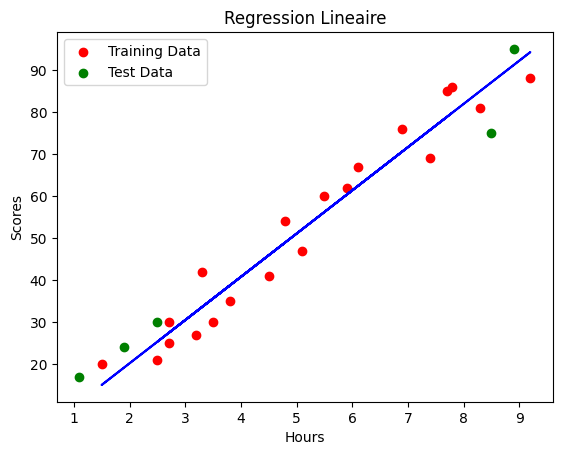

In [154]:
plt.scatter(X_train, y_train, color='red', label='Training Data') # Training data
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(X_train, modele_lineaire.predict(X_train), color='blue')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Regression Lineaire')
plt.legend()
plt.show()

In [157]:
print(modele_lineaire.coef_)

[10.28085594]


In [158]:
print(modele_lineaire.intercept_)

-0.33798242262133016


In [163]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [161]:
modele_lineaire.predict([[2.5]])

array([25.36415743])

In [164]:
b0 = modele_lineaire.coef_
b1 = modele_lineaire.intercept_

In [167]:
y_pred_simple = b1 + b0 * 2.5

In [168]:
y_pred_simple

array([25.36415743])